### Exercise 1.5

### 2.Start a new notebook in JupyterLab and import all of the libraries you’ll need.


In [110]:
import re
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk
import textblob

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

print("All imports successful!")


All imports successful!


In [19]:
print("All imports and NLTK data loaded successfully!")


All imports and NLTK data loaded successfully!


### 3.Load the twentieth-century data that you scraped in Exercise 1.4.


In [68]:
import os
os.getcwd()


'/Users/ryumugil'

In [101]:
from pathlib import Path

base = Path.home() / "Desktop" / "Achievement 7 "


In [103]:
list(base.iterdir())


[PosixPath('/Users/ryumugil/Desktop/Achievement 7 /03 Analysis'),
 PosixPath('/Users/ryumugil/Desktop/Achievement 7 /.DS_Store'),
 PosixPath('/Users/ryumugil/Desktop/Achievement 7 /01 Project Management'),
 PosixPath('/Users/ryumugil/Desktop/Achievement 7 /05 Sent to clients'),
 PosixPath('/Users/ryumugil/Desktop/Achievement 7 /02 Data'),
 PosixPath('/Users/ryumugil/Desktop/Achievement 7 /.gitignore'),
 PosixPath('/Users/ryumugil/Desktop/Achievement 7 /.ipynb_checkpoints'),
 PosixPath('/Users/ryumugil/Desktop/Achievement 7 /.git'),
 PosixPath('/Users/ryumugil/Desktop/Achievement 7 /04 Scripts')]

In [105]:
file_path = base / "02 Data" / "Prepared Data" / "key_events_20th_century.txt"

with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
    data_20th = f.read()

print(data_20th[:500])


Historic events in the 20th century

World at the beginning of the century

Spanish flu

Between the wars

Global war: World War II (1939–1945)

The post-war world

The world at the end of the century

See also

References

Sources

External links

The20th centurychanged the world in unprecedented ways. TheWorld Warssparked tension between countries and led to the creation ofatomic bombs, theCold Warled to theSpace Raceand the creation of space-based rockets, and theWorld Wide Webwas created. Th


### 4.Tokenize the words from the text and create a bar chart to plot the 10 most common words.

In [112]:
# Convert to lowercase
text = data_20th.lower()

# Remove punctuation and non-letter characters
text = re.sub(r"[^a-z\s]", " ", text)


In [114]:
tokens = word_tokenize(text) # Tokenize the words


In [118]:
word_counts = Counter(filtered_tokens) # Count word frequencies

# Get the 10 most common words
top_10 = word_counts.most_common(10)

top_10


[('war', 108),
 ('world', 55),
 ('soviet', 37),
 ('hitler', 37),
 ('would', 34),
 ('first', 33),
 ('germany', 29),
 ('germans', 28),
 ('states', 28),
 ('also', 27)]

In [120]:
df_top10 = pd.DataFrame(top_10, columns=["Word", "Occurrences"]) # Convert to a DataFrame(for plotting)
df_top10 


,Word,Occurrences
0,war,108
1,world,55
2,soviet,37
3,hitler,37
4,would,34
5,first,33
6,germany,29
7,germans,28
8,states,28
9,also,27


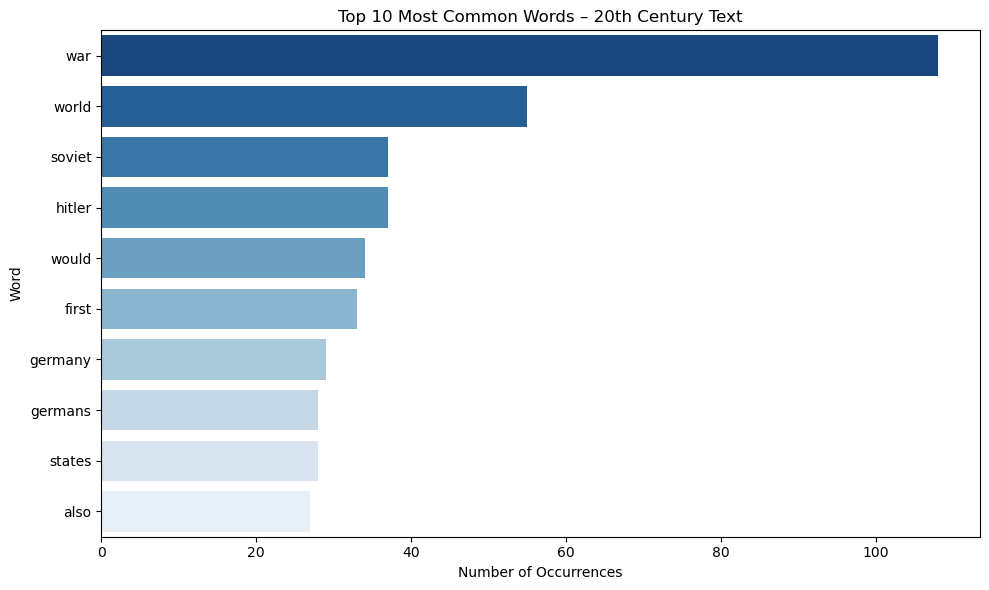

In [131]:
plt.figure(figsize=(10, 6)) # Create the bar chart

sns.barplot(
    data=df_top10,
    x="Occurrences",
    hue="Word",
    y="Word",
    palette="Blues_r",
    legend=False
)


plt.title("Top 10 Most Common Words – 20th Century Text")
plt.xlabel("Number of Occurrences")
plt.ylabel("Word")

plt.tight_layout()
plt.show()


### 5.Remove stop words (and punctuation marks if necessary), and rerun the plot. What has changed? Comment on your impressions in a markdown cell under the plot.

In [134]:
stop_words = set(stopwords.words("english")) # Remove Stopwords(for proper results)

filtered_tokens = [
    word for word in tokens
    if word not in stop_words and len(word) > 2
]


### Observations After Removing Stop Words and Punctuation

Before stopword removal, the most frequent words were common function words which are  “the,” “and,” “of”, which add little meaning to the analysis. 

After removing stopwords and punctuation, the plot emphasized content of rich words related to historical events and entities.

This matters because it reduces noise and allows the frequency analysis to better reflect the content
themes of the text.


### 6.Create a tags list using TextBlob.

In [146]:
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package punkt to /Users/ryumugil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ryumugil/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/ryumugil/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [152]:
file_path = "/Users/ryumugil/Desktop/Achievement 7 /02 Data/Prepared Data/key_events_20th_century.txt"

with open(file_path, "r", encoding="utf-8", errors="ignore") as file:
    data = file.read()

print(data[:500])


Historic events in the 20th century

World at the beginning of the century

Spanish flu

Between the wars

Global war: World War II (1939–1945)

The post-war world

The world at the end of the century

See also

References

Sources

External links

The20th centurychanged the world in unprecedented ways. TheWorld Warssparked tension between countries and led to the creation ofatomic bombs, theCold Warled to theSpace Raceand the creation of space-based rockets, and theWorld Wide Webwas created. Th


In [172]:
from textblob import TextBlob

text = TextBlob(data)
tags_list = text.tags

tags_list[:10]


[('Historic', 'JJ'),
 ('events', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('20th', 'JJ'),
 ('century', 'NN'),
 ('World', 'NNP'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('beginning', 'NN')]

### 7. Create a list of the Top 10 POS tags for words that appear in the article.

In [183]:
df_tags = pd.DataFrame(tags_list, columns=["Word", "POS"])
df_tags.head(10)


,Word,POS
0,Historic,JJ
1,events,NNS
2,in,IN
3,the,DT
4,20th,JJ
5,century,NN
6,World,NNP
7,at,IN
8,the,DT
9,beginning,NN


In [192]:
top10_pos = (
    df_tags["POS"]
    .value_counts()
    .reset_index()
)

top10_pos.columns = ["POS", "Occurrences"]

top10_pos = top10_pos.head(10)
top10_pos


,POS,Occurrences
0,NN,1497
1,IN,1279
2,DT,1168
3,NNP,1143
4,JJ,1014
5,VBD,671
6,NNS,644
7,RB,597
8,CD,530
9,CC,295


### 8.Plot this list in a bar chart using the seaborn library. Note: If you were with us for the Data Immersion Program, you’ve already learned about seaborn in Achievement 4.


In [194]:
print(top10_pos.dtypes)
print(top10_pos.columns)


POS            object
Occurrences     int64
dtype: object
Index(['POS', 'Occurrences'], dtype='object')


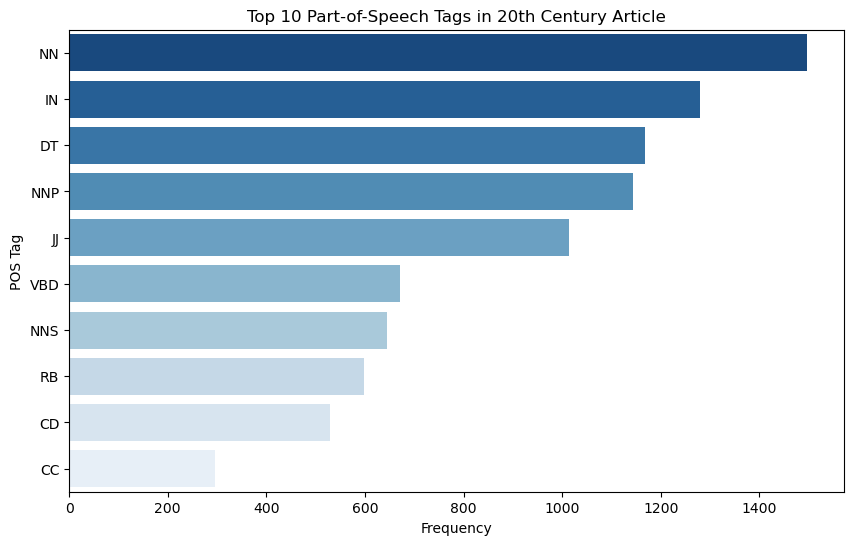

In [196]:

plt.figure(figsize=(10, 6))  # Plot the bar chart

sns.barplot(
    data=top10_pos,
    x="Occurrences",
    y="POS",
    hue="POS",          # required for seaborn >= 0.14
    palette="Blues_r",
    legend=False
)

plt.title("Top 10 Part-of-Speech Tags in 20th Century Article")
plt.xlabel("Frequency")
plt.ylabel("POS Tag")

plt.show()


### 9. Create three bar plots with the top 15 POS labels—one each for nouns, verbs, and adjectives. Analyzing the results—what do you think stands out in these frequencies? Comment on your impressions in a Markdown cell under the plot.

In [199]:
noun_tags = ["NN", "NNS", "NNP", "NNPS"]  # Define POS groups
verb_tags = ["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]
adj_tags  = ["JJ", "JJR", "JJS"]


In [201]:
def top_words_by_pos(df, pos_list, top_n=15):
    return (
        df[df["POS"].isin(pos_list)]
        .groupby("Word")
        .size()
        .reset_index(name="Count")
        .sort_values(by="Count", ascending=False)
        .head(top_n)
    )


In [224]:
top_nouns = top_words_by_pos(df_tags, noun_tags) # Top 15 words for each group
top_verbs = top_words_by_pos(df_tags, verb_tags)
top_adjectives  = top_words_by_pos(df_tags, adj_tags)


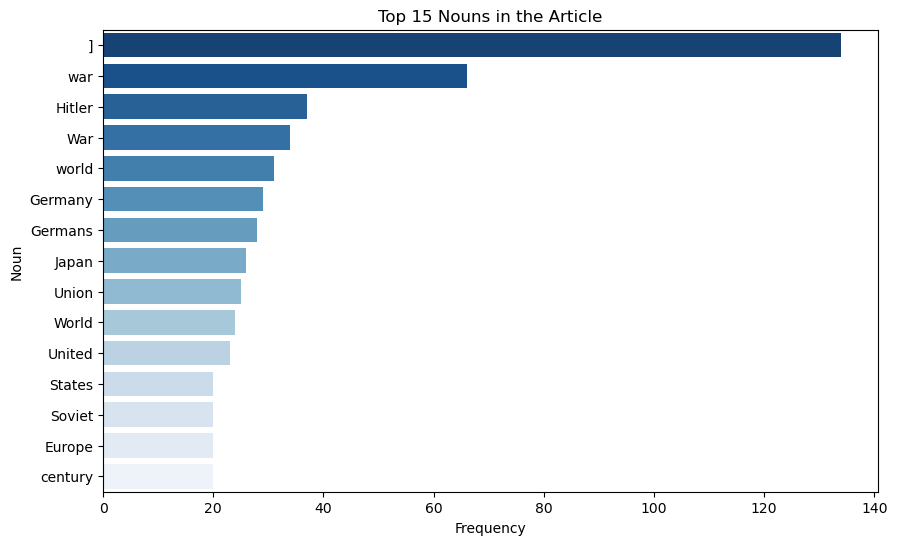

In [216]:
plt.figure(figsize=(10, 6))

sns.barplot(
    data=top_nouns,
    x="Count",
    y="Word",
    hue="Word",          # <-- add hue
    palette="Blues_r",
    legend=False         # <-- hide legend
)

plt.title("Top 15 Nouns in the Article")
plt.xlabel("Frequency")
plt.ylabel("Noun")
plt.show()



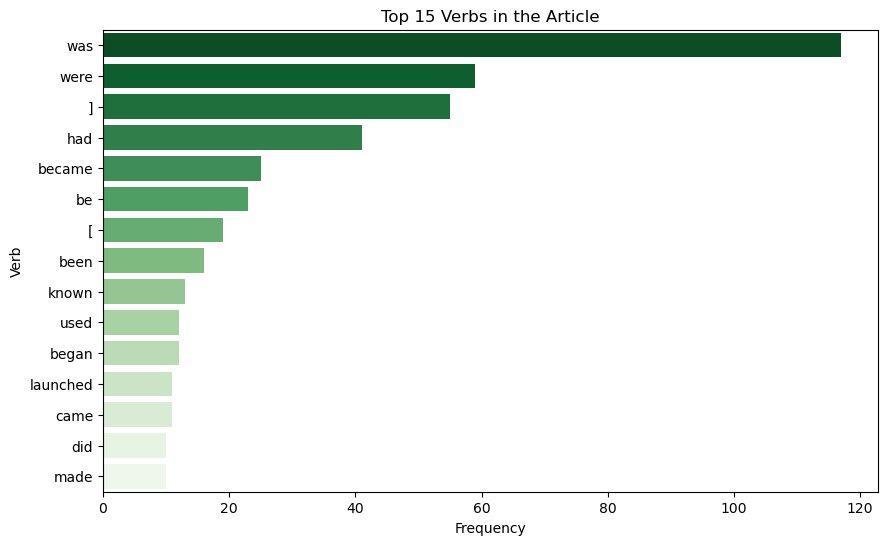

In [218]:
plt.figure(figsize=(10, 6))

sns.barplot(
    data=top_verbs,
    x="Count",
    y="Word",
    hue="Word",
    palette="Greens_r",
    legend=False
)

plt.title("Top 15 Verbs in the Article")
plt.xlabel("Frequency")
plt.ylabel("Verb")
plt.show()


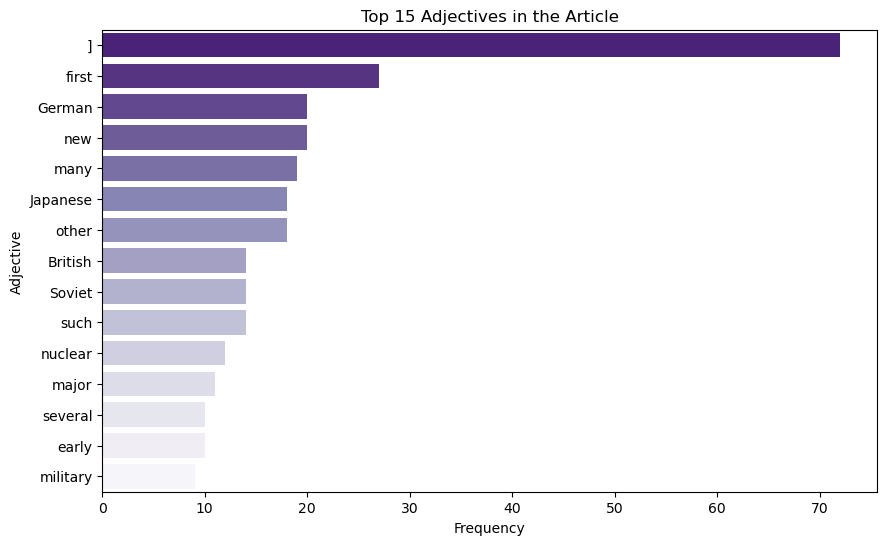

In [226]:

plt.figure(figsize=(10, 6))

sns.barplot(
    data=top_adjectives,
    x="Count",
    y="Word",
    hue="Word",
    palette="Purples_r",
    legend=False
)

plt.title("Top 15 Adjectives in the Article")
plt.xlabel("Frequency")
plt.ylabel("Adjective")
plt.show()


### POS Frequency Analysis


The noun frequency plot is dominated by references to people, places, and events, which reflects the text’s focus on documenting historical facts and entities.

The Verbs appear primarily in past tense, highlighting actions and changes over time.

The adjectives occur less frequently, indicating a factual and informational writing style rather than a descriptive or opinion-based one.

All these patterns confirm that the text emphasizes historical reporting over narrative or emotional language.


### 10. Create a dataframe with the countries and the number of times they’re mentioned in your text (remember—you’ll need to use the countries lookup list if you didn’t scrape one in the previous task).


In [239]:
countries = [
    "United States", "Germany", "France", "Britain", "United Kingdom",
    "Russia", "Soviet Union", "Japan", "China", "Italy",
    "Austria", "Hungary", "Poland", "Spain", "Europe"
]


In [245]:
text_lower = data_20th.lower()


In [247]:
from collections import Counter # Count country

country_counts = {}

for country in countries:
    count = text_lower.count(country.lower())
    if count > 0:
        country_counts[country] = count


In [249]:
# Convert results into DataFrame

df_countries = pd.DataFrame(
    country_counts.items(),
    columns=["Country", "Occurrences"]
).sort_values(by="Occurrences", ascending=False)

df_countries


,Country,Occurrences
7,Japan,55
1,Germany,31
6,Soviet Union,28
14,Europe,25
0,United States,21
2,France,14
12,Poland,12
3,Britain,11
5,Russia,11
8,China,10


In [251]:
df_countries.head(10)


,Country,Occurrences
7,Japan,55
1,Germany,31
6,Soviet Union,28
14,Europe,25
0,United States,21
2,France,14
12,Poland,12
3,Britain,11
5,Russia,11
8,China,10


### 11. Create a plot showing the frequency of the number of times these countries are mentioned in the text. Is there anything in particular you notice in this plot? Describe your findings in a Markdown cell underneath the plot.


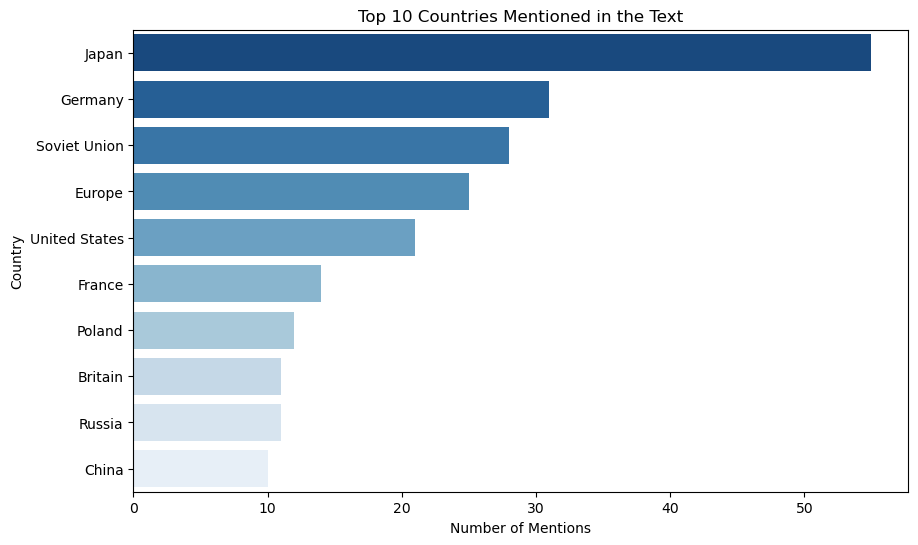

In [254]:

# Select top 10 most mentioned countries
top_countries = df_countries.sort_values(
    by="Occurrences", ascending=False
).head(10)

plt.figure(figsize=(10, 6))

sns.barplot(
    data=top_countries,
    x="Occurrences",
    y="Country",
    hue="Country",      # avoids seaborn FutureWarning
    palette="Blues_r",
    legend=False
)

plt.title("Top 10 Countries Mentioned in the Text")
plt.xlabel("Number of Mentions")
plt.ylabel("Country")

plt.show()


### Observations

The most frequently mentioned countries are those that played central roles in major twentieth-century events, such as global conflicts and political power shifts. Their dominance in the plot reflects the text’s emphasis on world wars, international relations, and geopolitical influence rather than equal global coverage. This pattern highlights how historical narratives often prioritize influential nations when discussing large-scale global events.
